In [230]:
##Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats as sts
from scipy.interpolate import interp1d
import numpy as np
import matplotlib as mpl
import seaborn as sns


In [231]:
### Bring in the dataset

bcorp = pd.read_csv('bcorp.csv')
bcorp.head()

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,"CPI Risk, Finance & Governance",1/13/2017,1/13/2017,certified,CPI is the professional services organisation ...,Management and Financial Consulting,Business Products & Services,"Professional services in risk, finance and gov...",Netherlands,Noord-Holland,...,NaN,2.2,2.3,NaN,2.0,NaN,NaN,2.7,NaN,1
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,E-Waste Solutions,6/8/2017,6/8/2017,certified,A market solution that seeks to reduce the env...,Recycling Services & Waste Management,Energy & Environmental Services,"collection, recovery and reuse of electrical a...",Colombia,Bogotá D.C.,...,1.1,NaN,1.6,0.8,3.2,NaN,NaN,3.7,NaN,1
4,LUMNI CHILE,8/24/2012,7/11/2017,certified,Lumni is a new kind of financial services comp...,Other,Financial Services,Equity Social Investments & Higher Education F...,Chile,Santiago,...,0.2,NaN,0.0,0.0,2.2,NaN,NaN,0.0,NaN,1


In [232]:
bcorp_US = bcorp[bcorp.country == "United States"]
for col in bcorp_US:
    print(col)

company_name
date_first_certified
date_certified
current_status
description
industry
industry_category
products_and_services
country
state
city
sector
size
b_corp_profile
website
assessment_year
overall_score
impact_area_community
impact_area_customers
impact_area_environment
impact_area_governance
impact_area_workers
impact_area_community_na_score
impact_area_customers_na_score
impact_area_environment_na_score
impact_area_governance_na_score
impact_area_workers_na_score
ia_community_it_civic_engagement_giving
ia_community_it_designed_for_charitable_giving
ia_community_it_designed_to_give
ia_community_it_diversity_inclusion
ia_community_it_job_creation
ia_community_it_local_economic_development
ia_community_it_local_involvement
ia_community_it_microdistribution_poverty_alleviation
ia_community_it_microfranchise_poverty_alleviation
ia_community_it_national_economic_development
ia_community_it_producer_cooperative
ia_community_it_suppliers_distributors
ia_community_it_suppliers_distribut

In [233]:
bcorp_US_cleaned = bcorp_US.drop(['website', 'b_corp_profile', 'description', 
                                  'industry', 'industry_category', 'products_and_services',
                                  'country', 'state', 'city', 'size', 'impact_area_community_na_score',
                                 'impact_area_customers_na_score', 'impact_area_environment_na_score', 'impact_area_governance_na_score',
                                 'impact_area_workers_na_score'], axis = 1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [234]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


# Guestion A

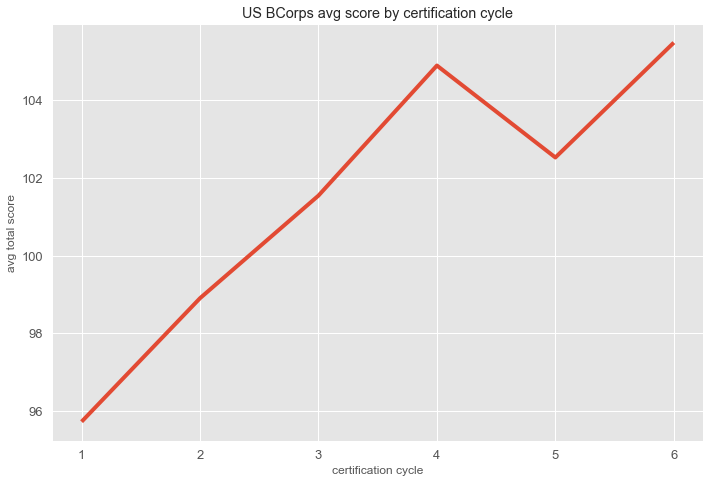

In [208]:
# Does a company’s impact score improve or worsen over the course of their tenure of certification? 
# (given that recertification is a 3 year cycle). 
avg_score=bcorp_US_cleaned.groupby('certification_cycle').mean()['overall_score']
avg_score=pd.DataFrame(avg_score)
avg_score

plt.style.use('ggplot')
plt.xlabel('certification cycle')
plt.ylabel('avg total score')
plt.title('US BCorps avg score by certification cycle')
plt.plot(avg_score, linewidth=4, markersize=10)
plt.savefig('graphs/scorebycycle_line.png')

# plt.show()

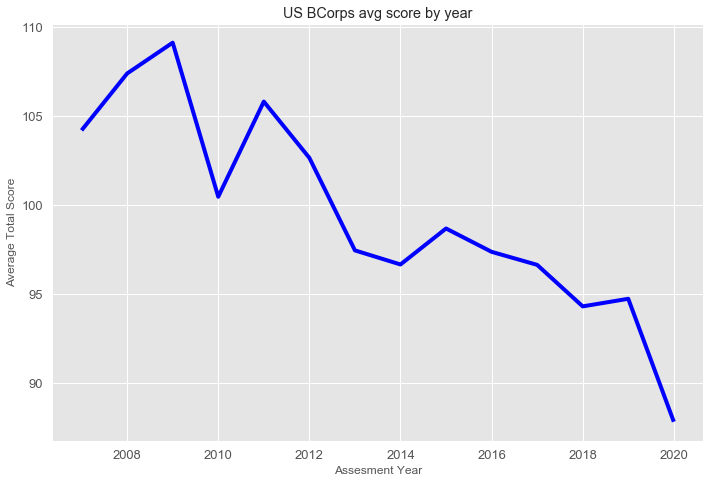

In [210]:
bcorp_US_cleaned.groupby(['assessment_year']).mean()['overall_score'].plot(linewidth=4, color="blue")

plt.style.use('ggplot')
plt.xlabel('Assesment Year')
plt.ylabel('Average Total Score')
plt.title('US BCorps avg score by year')
plt.savefig('graphs/avgscorebyyear_line.png')
plt.show()

In [235]:
bcorp_US_cleaned['date_first_certified'] = pd.to_datetime(bcorp_US_cleaned['date_first_certified'], errors='coerce')
bcorp_US_cleaned['firstcertyear'] = bcorp_US_cleaned['date_first_certified'].dt.year
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,...,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle,firstcertyear
1,Heather Paulsen Consulting,2015-12-30,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2015
2,Heather Paulsen Consulting,2015-12-30,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2015
9,Bark Media,2018-07-25,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018
10,Kosmenko & Co.,2016-08-30,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016
11,Kosmenko & Co.,2016-08-30,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016


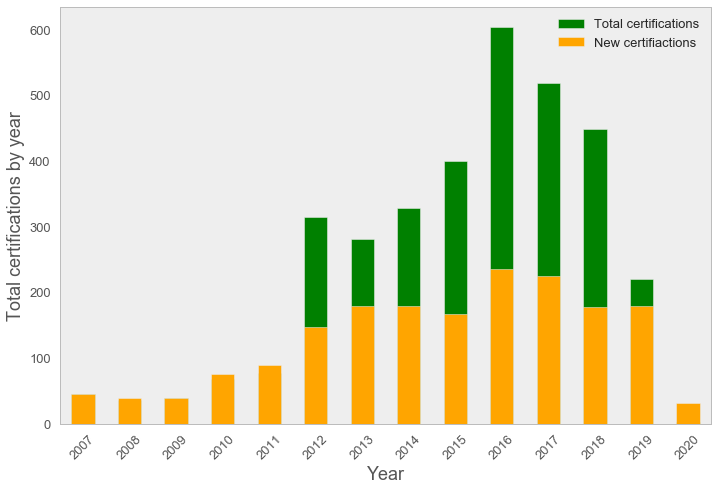

In [236]:
# fig, ax = plt.subplots(figsize=(10,10))

assesyr = bcorp_US_cleaned.groupby(['assessment_year'])['company_name'].count()
newcerts=bcorp_US_cleaned.groupby(['firstcertyear'])['company_name'].nunique()


fig, ax1 = plt.subplots()

# assesyr.plot(kind='bar')
plt.style.use('bmh')
assesyr.plot(kind='bar', color='green', label='Total certifications')
ax2 = ax1
newcerts.plot(kind='bar', color='orange', label='New certifiactions')
ax2.grid(b=False)
plt.ylabel("Total certifications by year", fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.legend()
plt.xticks(rotation=45)
plt.savefig('graphs/certificationsperyear.png')

plt.show()

In [ ]:
x_axis=bcorp_US_cleaned['date_certified']
y_axis=bcorp_US_cleaned['overall_score']
data=bcorp_US_cleaned['certification_cycle']

plt.figure(figsize=(20,20))
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75, s=data*25)
# scatterplot score, year, cycle s=data

plt.show()

In [173]:
bcorp_US_cleaned.sector.unique()

array(['Service with Minor Environmental Footprint', 'Wholesale/Retail',
       'Service with Significant Environmental Footprint',
       'Manufacturing', 'Agriculture/Growers', 'Service'], dtype=object)

# Question F

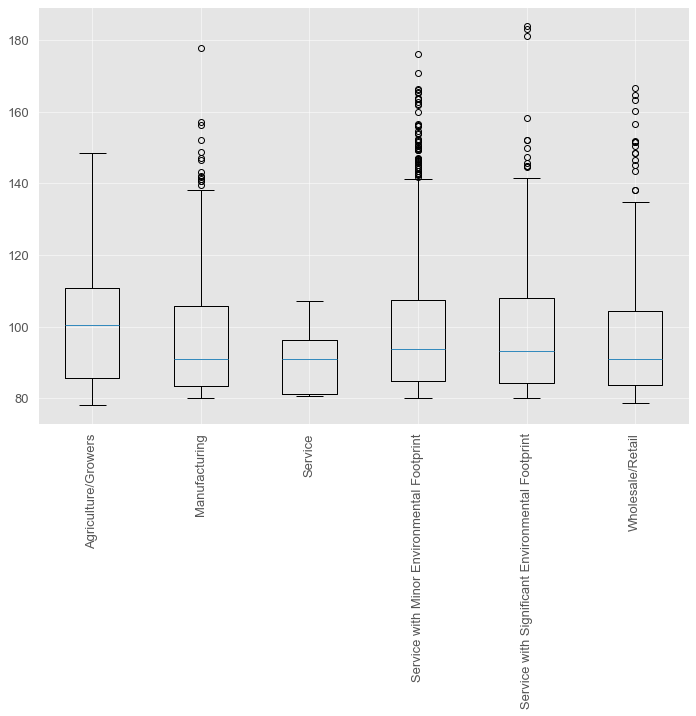

In [212]:
subsets = ['Agriculture/Growers', 'Manufacturing', 'Service', 'Service with Minor Environmental Footprint', 
           'Service with Significant Environmental Footprint', 'Wholesale/Retail']

plt.style.use('ggplot')
box_df = bcorp_US_cleaned.reset_index()
score_plot = box_df.groupby('sector')['overall_score'].apply(list)
score_plot_df = pd.DataFrame(score_plot)
score_plot_df = score_plot_df.reindex(subsets)
scores = [s for s in score_plot_df['overall_score']]
plt.boxplot(scores, labels=subsets)
plt.xticks(rotation=90)
plt.savefig('graphs/sectorscoreboxplt.png')
plt.show()


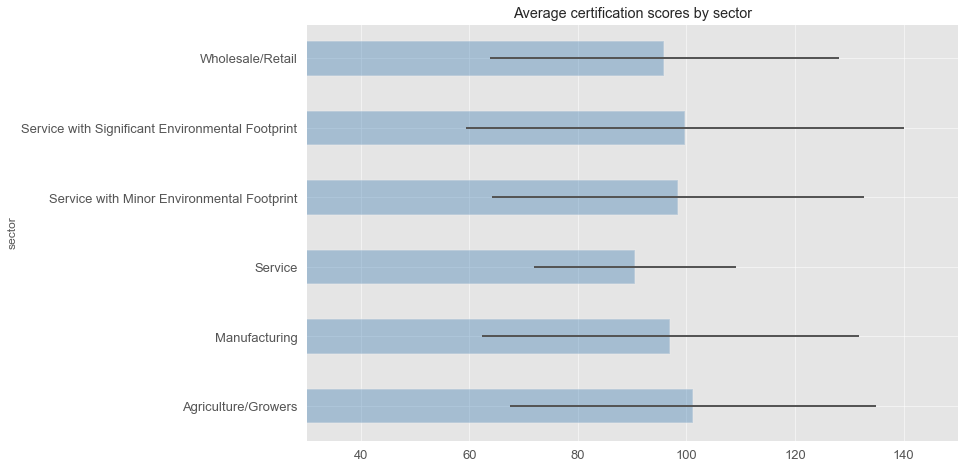

In [256]:
# by_sectors=bcorp_US_cleaned.groupby('sector').agg([np.mean, double_std, sp.sem])

def double_std(array):
 return np.std(array) * 2
import scipy.stats as sp 

by_sectors=bcorp_US_cleaned.groupby('sector').agg([np.mean, double_std, sp.sem])
sector_avgs=by_sectors["overall_score"]

# sector_avgs

sector_avgs.plot(kind = "barh", y = "mean", legend = False, title = "Average certification scores by sector",
                 xerr = "double_std", linewidth = 1.5, color = "steelblue", alpha = 0.4, capsize = 4)
plt.xlim((30,150))
plt.savefig('graphs/avgscorebysector_barh.png')
# sector_avgs.plot(kind = "bar", y = "mean", legend = False, title = "Average Avocado Prices", )

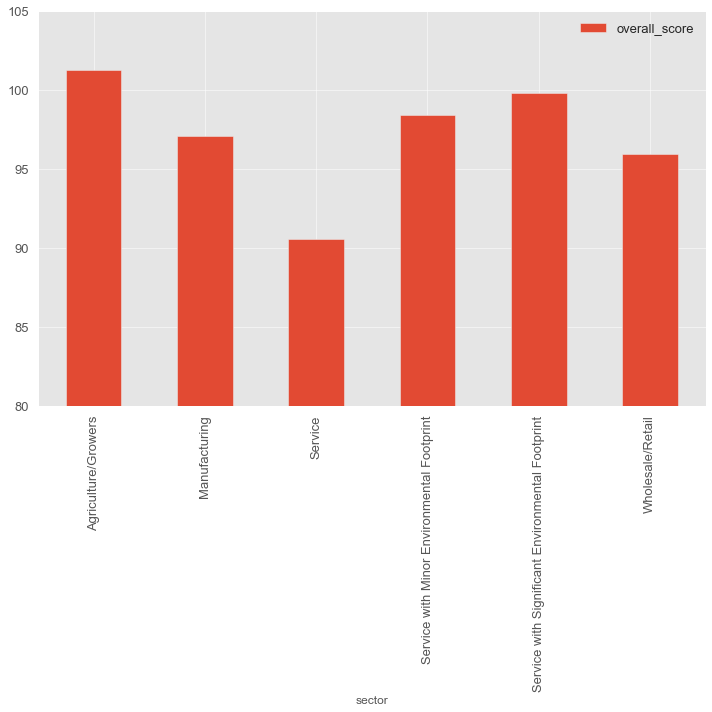

In [242]:
by_sector=bcorp_US_cleaned.groupby('sector').mean()['overall_score']
by_sector=pd.DataFrame(by_sector)
# # by_sector
plt.style.use('ggplot')
by_sector.plot(kind="bar", figsize=(10,10))
plt.ylim((80,105))
plt.savefig('graphs/avgscorebysector_bar.png')
plt.tight_layout()
plt.show()

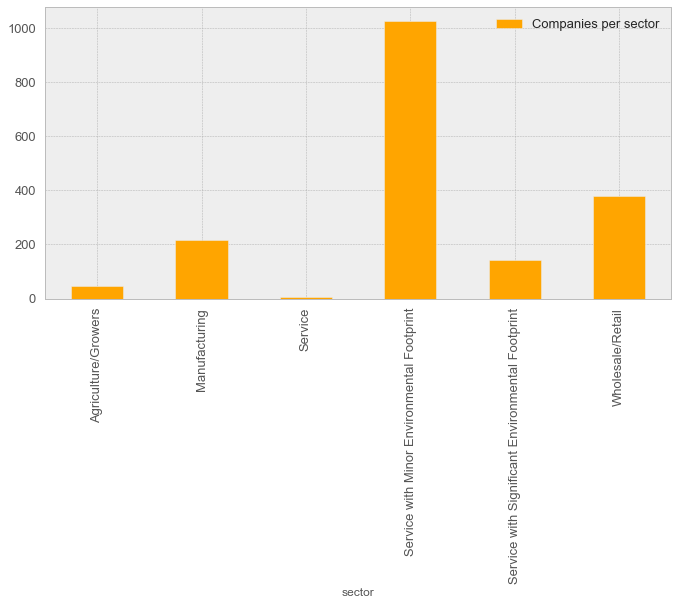

In [240]:
# What industries tend to improve their impact score over multiple certification cycles? 
# What industries tend to worsen their impact score over multiple certification cycles? 
# fig2, ax = plt.subplots(figsize=(10,10))
by_sector=bcorp_US_cleaned.groupby('sector').nunique()['company_name']
by_sector=pd.DataFrame(by_sector)
# by_sector
plt.style.use('bmh')
by_sector.plot(kind="bar", figsize=(10,5), color="orange")
plt.legend(['Companies per sector'])
plt.savefig('graphs/companiespersector_bar.png')

In [238]:
avg_by_sector=bcorp_US_cleaned.groupby(['sector','certification_cycle']).mean()['overall_score']
avg_by_sector=pd.DataFrame(avg_by_sector)
avg_by_sector.head()

overall_score
sector              certification_cycle               
Agriculture/Growers 1                        98.282979
                    2                       105.176000
                    3                       102.542857
                    4                       134.000000
Manufacturing       1                        95.000930

In [216]:
avg_by_sector["overall_score"].mean()

102.1022597530764

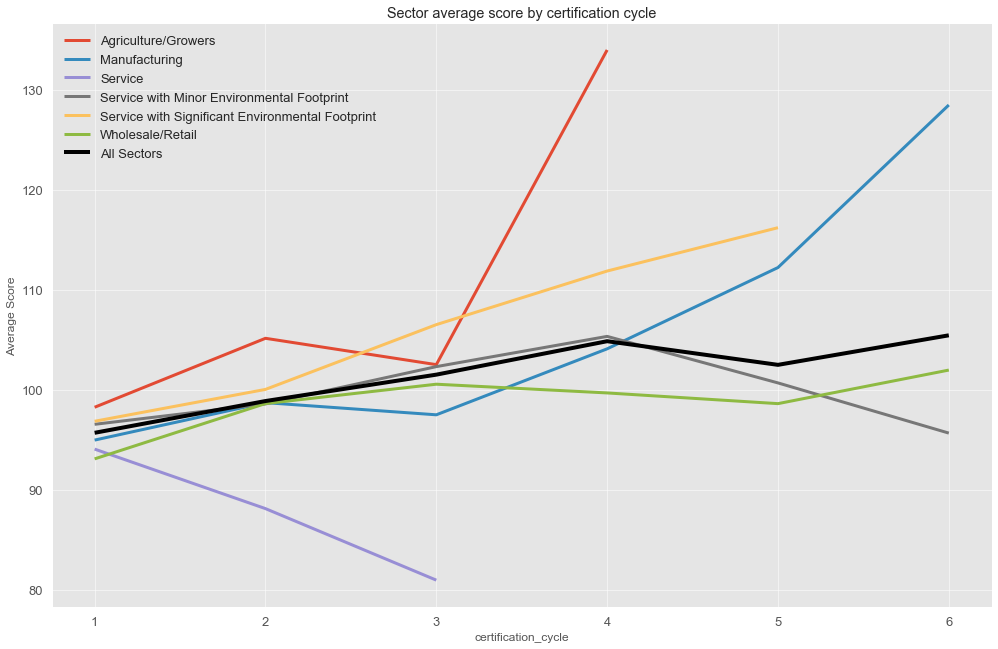

In [257]:
# plot data
fig, ax = plt.subplots(figsize=(15,10))


# use unstack()
bcorp_US_cleaned.groupby(['certification_cycle', 'sector']).mean()['overall_score'].unstack().plot(ax=ax, markevery=1, linewidth=3)
bcorp_US_cleaned.groupby(['certification_cycle']).mean()['overall_score'].plot(label="All Sectors",
                                                                               color="black",
                                                                               title= "Sector average score by certification cycle",
                                                                               markevery=1,
                                                                               linewidth=4)
plt.ylabel("Average Score")
plt.legend()
fig.savefig('graphs/avgscorebysector-cycle_line.png')
plt.show()

In [19]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_community_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [20]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_customers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [21]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_environment_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [23]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_workers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,ia_governance_it_corporate_accountability,ia_governance_it_ethics,ia_governance_it_governance,ia_governance_it_mission_engagement,ia_governance_it_mission_locked,ia_governance_it_transparency,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,NaN,0.0,NaN,NaN,4.0,2.5,3.5,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,0.0,NaN,NaN,NaN,1.9,2.5,3.5,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,NaN,0.0,NaN,NaN,1.7,7.5,3.5,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,NaN,NaN,NaN,NaN,3.7,10.0,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,NaN,0.0,NaN,NaN,1.5,2.5,1.3,2


In [37]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_governance_it' in col],axis=1)
bcorp_US_cleaned.nunique()

company_name               1817
date_first_certified       1288
date_certified             1751
current_status                2
assessment_year              14
overall_score               627
impact_area_community       629
impact_area_customers       572
impact_area_environment     545
impact_area_governance      206
impact_area_workers         396
certification_cycle           6
dtype: int64

In [42]:
companies = bcorp_US_cleaned.groupby('company_name')
companies.count()

,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,certification_cycle
company_name,,,,,,,,,,,
.org/advisors,1,1,1,1,1,1,1,1,1,0,1
100 Percent Wine,1,1,1,1,1,1,1,1,1,1,1
1051 by GOODONYA®,3,3,3,3,3,3,3,3,3,3,3
10Power,1,1,1,1,1,1,0,1,1,1,1
1908 Brands,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
sweetriot,1,1,1,1,1,1,1,1,1,1,1
"thedatabank, Gbc. (General Benefit Corporation)",3,3,3,3,3,3,3,3,3,3,3
therethere,1,1,1,1,1,1,1,1,1,1,1


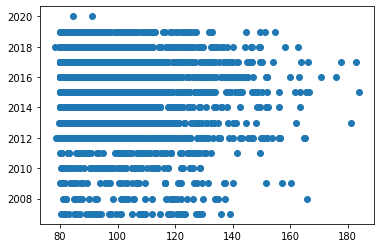

In [36]:
bcorp_US_cleaned 
plt.scatter(bcorp_US_cleaned.overall_score, bcorp_US_cleaned.assessment_year)

plt.show()


In [32]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_community, bcorp_US_cleaned.overall_score)
r

0.3815226252845382

In [34]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_governance, bcorp_US_cleaned.overall_score)
r

0.22179038167069323

In [35]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_workers, bcorp_US_cleaned.overall_score)
r

nan

In [14]:
##Clean up--find nulls 
bcorp_nulls = bcorp.isnull()
bcorp_nulls2 = bcorpnulls.loc[]

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
6696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
6697,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
6698,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,True,False


In [8]:
bcorp.describe()

,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
count,6700.000000,6700.000000,6700.000000,6373.000000,6700.000000,6700.000000,6032.000000,6700.000000,6373.000000,6700.000000,...,891.000000,2211.000000,4820.000000,1714.000000,4029.000000,2098.000000,200.000000,4604.000000,420.000000,6700.000000
mean,2015.767612,96.509388,30.547619,15.572917,17.798963,12.513090,23.099577,0.714858,0.027915,0.581649,...,0.699551,2.011940,3.249876,1.029755,1.749392,6.832793,6.066000,2.669353,15.862381,1.537164
std,2.355011,16.529540,14.845124,17.178484,13.625884,3.992916,9.812453,0.909584,0.239016,1.053494,...,0.429894,0.872352,2.085339,0.714891,1.113376,3.232137,10.923335,1.935648,14.348564,0.819576
min,2007.000000,78.200000,4.400000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,83.700000,20.200000,0.000000,7.400000,9.400000,19.000000,0.000000,0.000000,0.000000,...,0.400000,1.400000,1.800000,0.600000,1.000000,4.500000,0.000000,1.800000,2.275000,1.000000
50%,2016.000000,91.300000,26.300000,9.900000,12.100000,12.500000,23.900000,0.500000,0.000000,0.200000,...,0.800000,2.000000,2.700000,1.100000,1.600000,6.900000,0.000000,2.600000,14.050000,1.000000
75%,2018.000000,104.400000,38.000000,27.100000,27.025000,15.400000,28.700000,1.100000,0.000000,0.800000,...,1.100000,2.700000,4.425000,1.300000,2.300000,9.100000,3.100000,3.000000,25.800000,2.000000
max,2020.000000,184.000000,125.400000,79.400000,96.900000,41.300000,81.800000,8.000000,8.800000,22.900000,...,1.600000,5.300000,14.400000,7.700000,9.100000,21.300000,30.000000,19.500000,61.800000,6.000000
